## Propagation Simulation
The diffraction equation either the Rayleigh-Sommerfield or with simplified approximations like the Fresnel, both can be written in terms of convolution integrals. Fourier transforms can be used to convert the convolution to a simple multiplication.

As an example if we take a one dimensional convolution integral such that the impulse is $h(x)$ and the input is $f(x)$, the convolution integral is given by:

$$ g(x) = h(x)*f(x) = \int_{-\infty}^{\infty} h(x - x') f(x') dx' $$

Note the limits of integration are from $-\infty$ to $\infty$. The convolution theorem of Fourier transforms states that the convolution integral can be converted to a multiplication in the Fourier domain. 

$$ \mathcal{F} \left\{ g(x) \right\} = \mathcal{F} \left\{ h(x) \right\} \mathcal{F} \left\{ f(x) \right\} $$
$$ g(x) = \mathcal{F}^{-1} \left\{ \mathcal{F} \left\{ h(x) \right\} \mathcal{F} \left\{ f(x) \right\} \right\} $$

### Different Propagators

Two different approaches to the Fresnel propgagation is presented. The two differe in the aapproach as to how the response of the impulse is calculated. The "propTF" has an analytical form of the response with some simiplifications. The "propIR" calculates the response using Fourier transformation.

The limitations and advantages of the two approaches are discussed in the references.

### References
[1] Computational Fourier Optics: A Matlab Tutorial. - David Vuelz

In [1]:
# import scipy for fft
from scipy.fftpack import fft2,fft,ifft2,ifft
from scipy.fftpack import fftshift, fftfreq, ifftshift
import numpy as np
import matplotlib.pyplot as plt

## Define a function propTF to calculate the transfer function of the Fresnel propagator
# uses one FFT
def propTF(u1, L , wln , z):
    # propagation transfer function approach, assumes same x and y side lengths and uniform sampling
    # u1 is the wave in the source plane
    # L is the side length of the source plane and observation plane
    # wln is the wavelength
    # z is the propagation distance
    # returns the observation plane results

    # input field arrays
    M,N = np.shape(u1)
    dx = L/M
    k = 2*np.pi/wln

    # x and y assumed to have the same number of points so dy = dx

    # make the frequency coordinates
    fx = np.linspace(-1/(2*dx), 1/(2*dx)-1/L, M)
    fy = np.linspace(-1/(2*dx), 1/(2*dx)-1/L, N)

    # make a meshgrid
    fx_mesh, fy_mesh = np.meshgrid(fx, fy)

    # make the transfer function
    z_ph = np.exp(1j*k*z)
    H = np.exp(-1j*np.pi*wln*z*(fx_mesh**2 + fy_mesh**2))*z_ph
    H = fftshift(H)


    # fft of the input field
    u1_fft = fft2(fftshift(u1))
    u2 = H*u1_fft
    
    u2_out = ifftshift(ifft2(u2))

    return u2_out



# Fresnel Impulse Response (IR) Propagator
# Here are two FFT's required , so you work on the spatial coordinates first
def propIR(u1,L,wln,z):
    # Fresnel impulse response approach, assumes same x and y side lengths and uniform sampling
    # u1 is the wave in the source plane
    # L is the side length of the source plane and observation plane
    # wln is the wavelength
    # z is the propagation distance
    # returns the observation plane results

    # input field arrays
    M,N = np.shape(u1)
    dx = L/M
    dy = L/N
    k = 2*np.pi/wln

    # x and y same coordinates
    x = np.linspace(-L/2, L/2-dx, M)
    y = np.linspace(-L/2, L/2-dy, N)

    # make a meshgrid
    x_mesh, y_mesh = np.meshgrid(x, y)

    # make the impulse response
    h = np.exp(1j*k*z)/(1j*wln*z)*np.exp(1j*k/(2*z)*(x_mesh**2 + y_mesh**2))

    # the transfer function is the fft of the impulse response
    hf = fft2(fftshift(h))*dx*dy

    # fft of source field
    u1f = fft2(fftshift(u1))      # take note of the sacling factor used here, since one IFFT will be used the scaling can be removed

    # multiply the source field by the transfer function
    u2f = hf*u1f

    # inverse fft to get the observation plane field
    u2_out = ifftshift(ifft2(u2f))


    return u2_out

### Test Propagation of Other Beams ( Flat - Top)

The intensity of a Flat-Top beam propagating in the z direction is not known analytically. Might have analytical results but is complicated. The intensity distribution at $z = 0$ is assumed a shape of flat-top described by the following distribution:

$$ I(x,y,z) = I_0 exp\left( -2 \left(\frac{x^2 + y^2}{w_0^2}\right)^p \right) $$

where $I_0$ is the peak intensity at $w_0$ ( waist ). For the electric field squared gives the intensity distribution. So the electric field is assumed to be given by the following where $p = 1$ gives a Gaussian beam while $p > 1$ gives a flat-top beams with a sharper edge on increasing $p$.

$$ E(x,y) = E_0 exp\left( -\left(\frac{x^2 + y^2}{w_0^2}\right)^p \right) $$

This electric field distribution is propagated using the Fresnel propagator and the results presented below.

wavelength = 1.064 um
w0 = 300.0 um
z_R = 265.7362206983847 mm
 Number of points in the source plane in one axis = 1024
Critical sampling = 0.2827433388230814 um
Current sampling, dx = 9.765625 um
dx > good for TF approach, dx < good for IR approach
Using TF approach


Text(0, 0.5, 'y (m)')

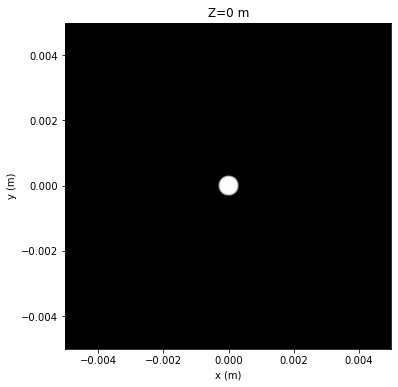

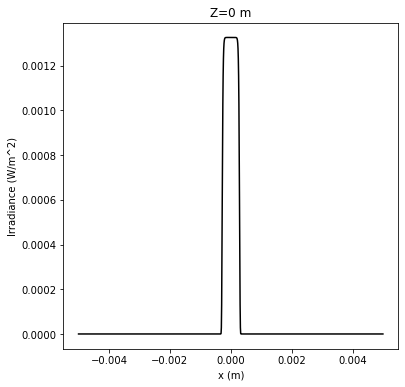

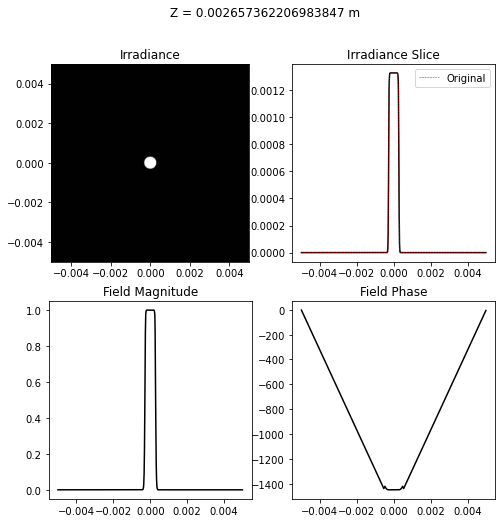

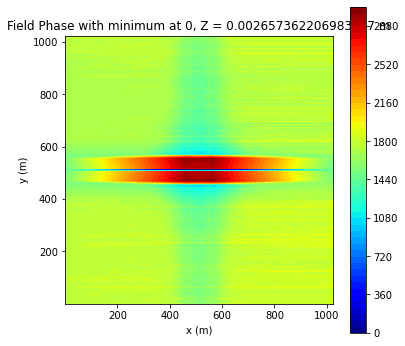

In [2]:

# EM wave details
wln = 1064.0e-9        # wavelength
A0 = 1.0              # amplitude of the source V/m
eta_0 = 377.0         # free space impedance
k = 2*np.pi/wln      # wave number

# waist size
w0 = 300.0e-6
# rayleigh range
z_R = np.pi*w0**2/wln

L1 = 10.00e-3            # side length of the source plane, here same for the source and observation plane but might be different for other propagators
M = 1024                 # number of points in the source plane
dx1 = L1/M                # source plane sampling


# print the main parameters of the setup
print('wavelength = ' + str(wln*1e6) + ' um')
print('w0 = ' + str(w0*1e6) + ' um')
print('z_R = ' + str(z_R*1e3) + ' mm')
print(' Number of points in the source plane in one axis = ' + str(M))

# make the source plane coordinates
# Source and observation planes can have different coordinates
# x2 would be the observation plane coordinates for x axis
x1 = np.linspace(-L1/2, L1/2-dx1, M)
y1 = np.linspace(-L1/2, L1/2-dx1, M)


# make a meshgrid
x1_mesh, y1_mesh = np.meshgrid(x1, y1)


# !!! Che the Profiles of the beam !!!
# u1 = np.zeros((M,M), dtype=complex)
p = 8 # for changing the shape of the beam
u1 = A0*np.exp(-((x1_mesh**2 + y1_mesh**2)/w0**2)**p)*np.ones((M,M), dtype=complex)



# irradiance of the source
# i1 = A0**2/(2.0*eta_0)
i1 = np.abs(u1)**2/(2.0*eta_0)
# plot the source irradiance
fig, ax = plt.subplots(1,1, figsize=(6,6))
contour = ax.contourf(x1_mesh, y1_mesh, i1, 100, cmap='gray')

# set equal aspect ratio, and label the axes
ax.set_aspect('equal')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_title('Z=0 m')


# show a 1D slice of the irradiance
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.plot(x1, i1[M//2,:], 'k')
ax.set_xlabel('x (m)')
ax.set_ylabel('Irradiance (W/m^2)')
ax.set_title('Z=0 m')

## PROPAGATION#################################################

zmin = z_R*0.01
zmax = z_R*6.0

## Test for one propagation distance before running over all the distances
z = zmin   # choose one propagation distance



## Sampling resolution
cri_samp = wln*z/L1
# print the critical sampling
print('Critical sampling = ' + str(cri_samp*1e6) + ' um')
# print current sampling
print('Current sampling, dx = ' + str(dx1*1e6) + ' um')
# print a disclaimer on what sampling to use
print("dx > good for TF approach, dx < good for IR approach")

# suggest what to use and select the propagator
if dx1 > cri_samp:
    print('Using TF approach')
    u2 = propTF(u1, L1, wln, z)     # transfer function approach
else:
    print('Use IR approach')
    u2 = propIR(u1, L1, wln, z)     # impulse response approach



# observation plane coordinates
x2 = x1
y2 = y1
i2 = np.abs(u2)**2/(2.0*eta_0)

wz = w0*np.sqrt(1 + (z/z_R)**2)
# find the analytical irradiance for the gaussian beam
i2_analytical = A0**2/(2.0*eta_0)*(w0/wz)**2.0*np.exp(-2.0*(x1_mesh**2 + y1_mesh**2)/wz**2)

# plot results: 4 subplots
fig, ax = plt.subplots(2,2, figsize=(8,8))
# set all plots aspects to equal
ax[0,0].set_aspect('equal')

# first plot the irradiance
contour = ax[0,0].contourf(x2, y2, i2, 100, cmap='gray')


# plot slice of the irradiance
ax[0,1].plot(x2, i2[M//2,:], 'k')
# plot slice of original irradiance
ax[0,1].plot(x1, i1[M//2,:], 'r', linestyle='--', linewidth=0.5, label='Original')
# plot slice of analytical irradiance
# ax[0,1].plot(x2, i2_analytical[M//2,:], 'b--', linewidth=1, label='Analytical')
# set the legend
ax[0,1].legend()

# observed field magnitude
ax[1,0].plot(x2, np.abs(u2[M//2,:]), 'k')
# field at source plane for reference
# ax[1,0].plot(x1, np.abs(u1[M//2,:]), 'r', linestyle='--', linewidth=0.5)

# observed field phase after unwrapping
ax[1,1].plot(x2, np.unwrap(np.angle(u2[M//2,:])), 'k')
# # contour plot of the phase with unwrapping in both directions
# phase = np.unwrap(np.unwrap(np.angle(u2), axis=0), axis=1)
# contour = ax[1,1].contourf(x2, y2, phase, 100, cmap='jet')
# # show the colorbar
# fig.colorbar(contour, ax=ax[1,1])

# set title for the figure
fig.suptitle('Z = ' + str(z) + ' m')
ax[0,0].set_title('Irradiance')
ax[0,1].set_title('Irradiance Slice')
ax[1,0].set_title('Field Magnitude')
ax[1,1].set_title('Field Phase')



# new plot for 2D phase
fig, ax = plt.subplots(1,1, figsize=(6,6))
# contour plot of the phase with unwrapping in both directions
phase = np.unwrap(np.unwrap(np.angle(u2), axis=0), axis=1)
# make all the values positive for the contour plot
phase = phase + np.abs(np.min(phase))
contour = ax.contourf(x2, y2, phase, 100, cmap='jet')
# contour = ax.contourf(x2, y2, np.abs(phase), 100, cmap='jet')
contour = ax.contourf(phase, 50, cmap='jet')
# show the colorbar horizontal
fig.colorbar(contour, ax=ax, orientation='vertical')
# equal aspect ratio
ax.set_aspect('equal')
# set title for the figure
ax.set_title('Field Phase with minimum at 0, Z = ' + str(z) + ' m')
# set equal aspect ratio, and label the axes
# ax.set_aspect('equal')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')

In [3]:
## Propagation in the xz plane

# zmin = wln*10.0

zmin = z_R*0.01
zmax = z_R*4.0
divs_z = 200

# make logarithmically spaced z values
# zvals = np.logspace(np.log10(zmin), np.log10(zmax), divs_z)
z2 = 10.0**np.linspace(np.log10(zmin), np.log10(zmax), divs_z)

# make the xz plane
x2 = x1

z2_mesh, x2_mesh = np.meshgrid(z2, x2, indexing='ij')

wz = w0*np.sqrt(1 + (z2_mesh/z_R)**2)

# Results in the xz plane
u2_xz = np.zeros_like(z2_mesh, dtype=np.complex128)

# the result at z = 0 is the same as the source plane
u2_xz[0,:] = u1[M//2,:]

# # loop over the z values
# for i in range(1,divs_z):
#     # propagate the field
#     # u2_z = propTF(u1, L1, wln, z2[i])
#     u2_z = propIR(u1, L1, wln, z2[i])

#     # store the results
#     u2_xz[i,:] = u2_z[M//2,:]


# ## loop over the z values to the new field but use first method for half of z and second method for the other half
# for i in range(1,divs_z//2):
#     # propagate the field
#     u2_z = propTF(u1, L1, wln, z2[i])

#     # store the results
#     u2_xz[i,:] = u2_z[M//2,:]

# for i in range(divs_z//2,divs_z):
#     # propagate the field
#     u2_z = propIR(u1, L1, wln, z2[i])

#     # store the results
#     u2_xz[i,:] = u2_z[M//2,:]


# select the propagator based on critical sampling
cir_samples = wln*z2/L1 # critical sample for each z value
# find the first index when dx < cir_samples in cir_samples
# initially dx will be larger than cir_samples so use TF approach
# after dx < cir_samples use IR approach
id_change = np.where(cir_samples > dx1)[0][0]
for i in range(1,id_change):
    # propagate the field
    u2_z = propTF(u1, L1, wln, z2[i])

    # store the results
    u2_xz[i,:] = u2_z[M//2,:]

for i in range(id_change,divs_z):
    # propagate the field
    u2_z = propIR(u1, L1, wln, z2[i])

    # store the results
    u2_xz[i,:] = u2_z[M//2,:]

# calculate the irradiance
i2_xz = np.abs(u2_xz)**2/(2.0*eta_0)



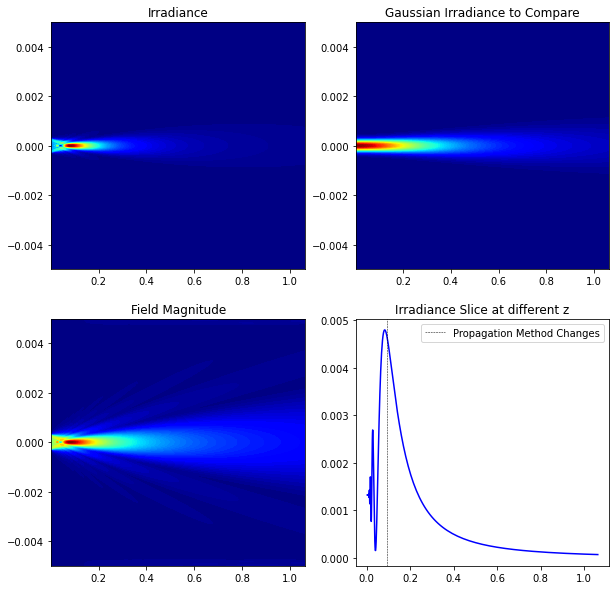

In [6]:
# plot the results: make 4 subplots
fig, ax = plt.subplots(2,2, figsize=(10,10))

# first plot the irradiance
contour = ax[0,0].contourf(z2_mesh, x2_mesh, i2_xz, 100, cmap='jet')
# equal aspect ratio
# ax[0,0].set_aspect('equal')
ax[0,0].set_title('Irradiance')

# plot the analytical irradiance
i2_xz_analytical = A0**2/(2.0*eta_0)*(w0/wz)**2.0*np.exp(-2.0*(x2_mesh**2)/wz**2)
# contour plot
contour = ax[0,1].contourf(z2_mesh, x2_mesh, i2_xz_analytical, 100, cmap='jet')
# equal aspect ratio
# ax[0,1].set_aspect('equal')
ax[0,1].set_title('Gaussian Irradiance to Compare')

# plot the magnitude of the field
contour = ax[1,0].contourf(z2_mesh, x2_mesh, np.abs(u2_xz), 100, cmap='jet')
ax[1,0].set_title('Field Magnitude')


# # plot the intensity of the field at mid z
# ax[1,1].plot(x2, i2_xz[divs_z//2,:], 'b--', label='Numerical-i')
# # plot the analytical intensity
# ax[1,1].plot(x2, i2_xz_analytical[divs_z//2,:], 'g--', linewidth=1, label='Analytical-i')
# # plot the intensity of the field at the end z
# ax[1,1].plot(x2, i2_xz[-1,:], 'k--', label='Numerical-ii')
# # plot the analytical intensity
# ax[1,1].plot(x2, i2_xz_analytical[-1,:], 'r--', linewidth=1, label='Analytical-ii')



# plot the irradiance slice at x = 0
ax[1,1].plot(z2, i2_xz[:,M//2], 'b')


# ax[1,1].legend()
ax[1,1].set_title('Irradiance Slice at different z')


# also plot a vertical line when id change happened
ax[1,1].axvline(z2[id_change], color='k', linestyle='--',linewidth=0.5, label='Propagation Method Changes')
# ax[1,1].plot([z2[id_change],z2[id_change]], [0,1], 'k--')

ax[1,1].legend()

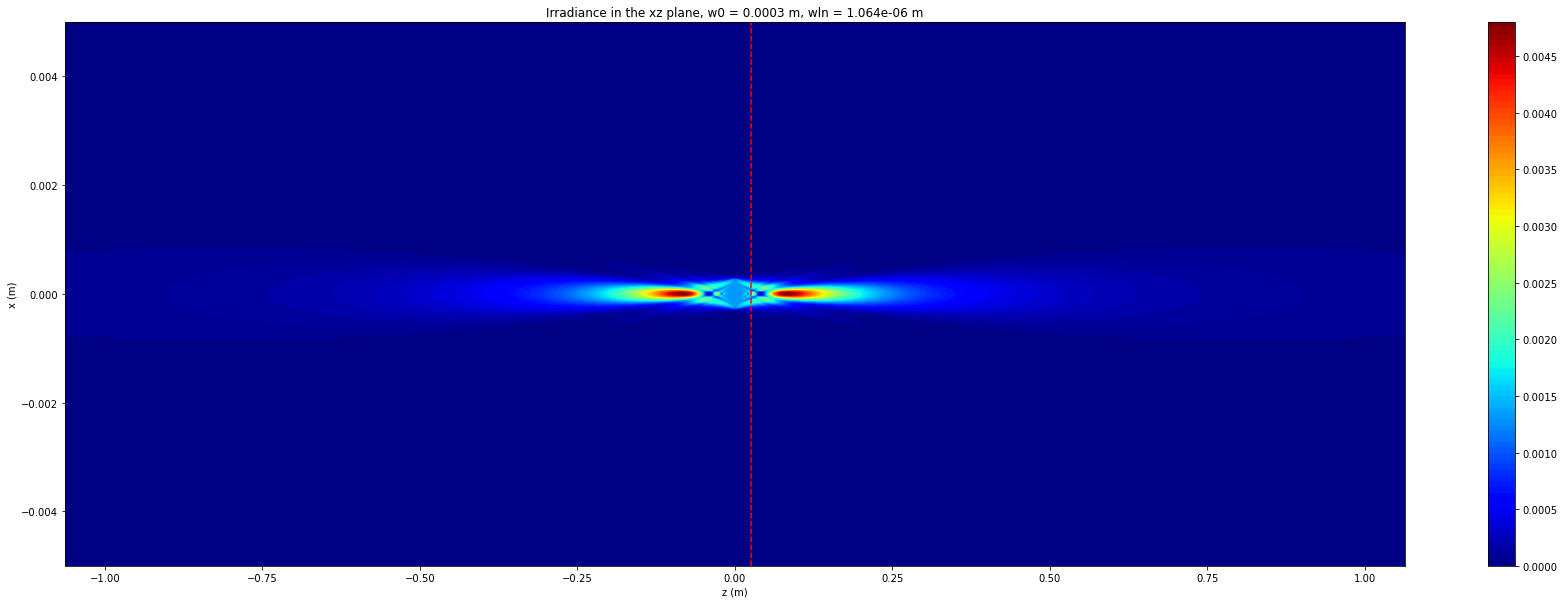

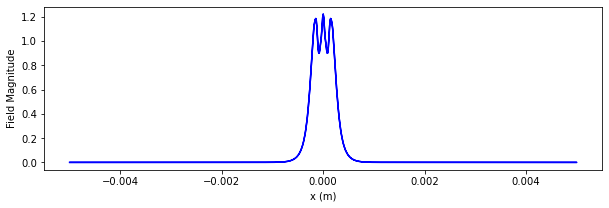

In [8]:
# do a contour plot of xz by extending z axis by reflection along z=0

# select a value of z to plot the irradiance at
z = 0.025


new_x2 = np.concatenate((x2, -x2))
new_z2 = np.concatenate((z2, -z2))

new_i2_xz = np.concatenate((i2_xz, i2_xz), axis=1)
new_u2_xz = np.concatenate((u2_xz, u2_xz), axis=1)


# flatten the arrays and results
flat_x2 = x2_mesh.flatten()
flat_z2 = z2_mesh.flatten()
flat_i2_xz = i2_xz.flatten()
flat_u2_xz = u2_xz.flatten()

# now reflect the results along z = 0
new_flat_x2 = np.concatenate((flat_x2, flat_x2))
new_flat_z2 = np.concatenate((flat_z2, -flat_z2))
new_flat_i2_xz = np.concatenate((flat_i2_xz, flat_i2_xz))
new_flat_u2_xz = np.concatenate((flat_u2_xz, flat_u2_xz))


# plot the results:
fig, ax = plt.subplots(1,1, figsize=(30,10))

ax.set_xlabel('z (m)')
ax.set_ylabel('x (m)')
# ax.set_title('Irradiance in the xz plane')
# title specifying w0 and wln
ax.set_title('Irradiance in the xz plane, w0 = ' + str(w0) + ' m, wln = ' + str(wln) + ' m')

# contour plot
# contour = ax.contourf(z2_mesh, x2_mesh, i2_xz, 100, cmap='jet')
# # plot the reflection of the contour plot from z=0
# contour = ax.contourf(-z2_mesh, x2_mesh, i2_xz, 100, cmap='jet')

# contour plot from flat arrays, tri contour
contour = ax.tricontourf(new_flat_z2, new_flat_x2, new_flat_i2_xz, 100, cmap='jet')



# colorbar
fig.colorbar(contour, ax=ax)


# define a function to give the irradiance result at specifiec z
def get_irradiance_at_z(z,i2_xz):
    # find the index of the z value in the z array
    id = np.argmin(np.abs(z2-z))
    # return the irradiance at that z
    return i2_xz[id,:]

# plot new results from speficied z
fig, ax1 = plt.subplots(1,1, figsize=(10,3))

ax1.set_xlabel('x (m)')
ax1.set_ylabel('Field Magnitude')



# plot the irradiance at that z
# ax1.plot(new_x2, get_irradiance_at_z(z, new_i2_xz), 'b', label='z = {:.2e} m'.format(z))
# ax1.plot(new_x2, get_irradiance_at_z(z, new_u2_xz), 'b', label='z = {:.2e} m'.format(z))
to_plt = get_irradiance_at_z(z, new_u2_xz)
ax1.plot(new_x2, np.abs(to_plt), 'b', label='z = {:.2e} m'.format(z))

# plot the line at chose n z on the previous plot
ax.plot([z,z], [x2[0], x2[-1]], 'r--', label='z = {:.2e} m'.format(z))


### To make a video of the propagation
Saves the video where the notebook is located.

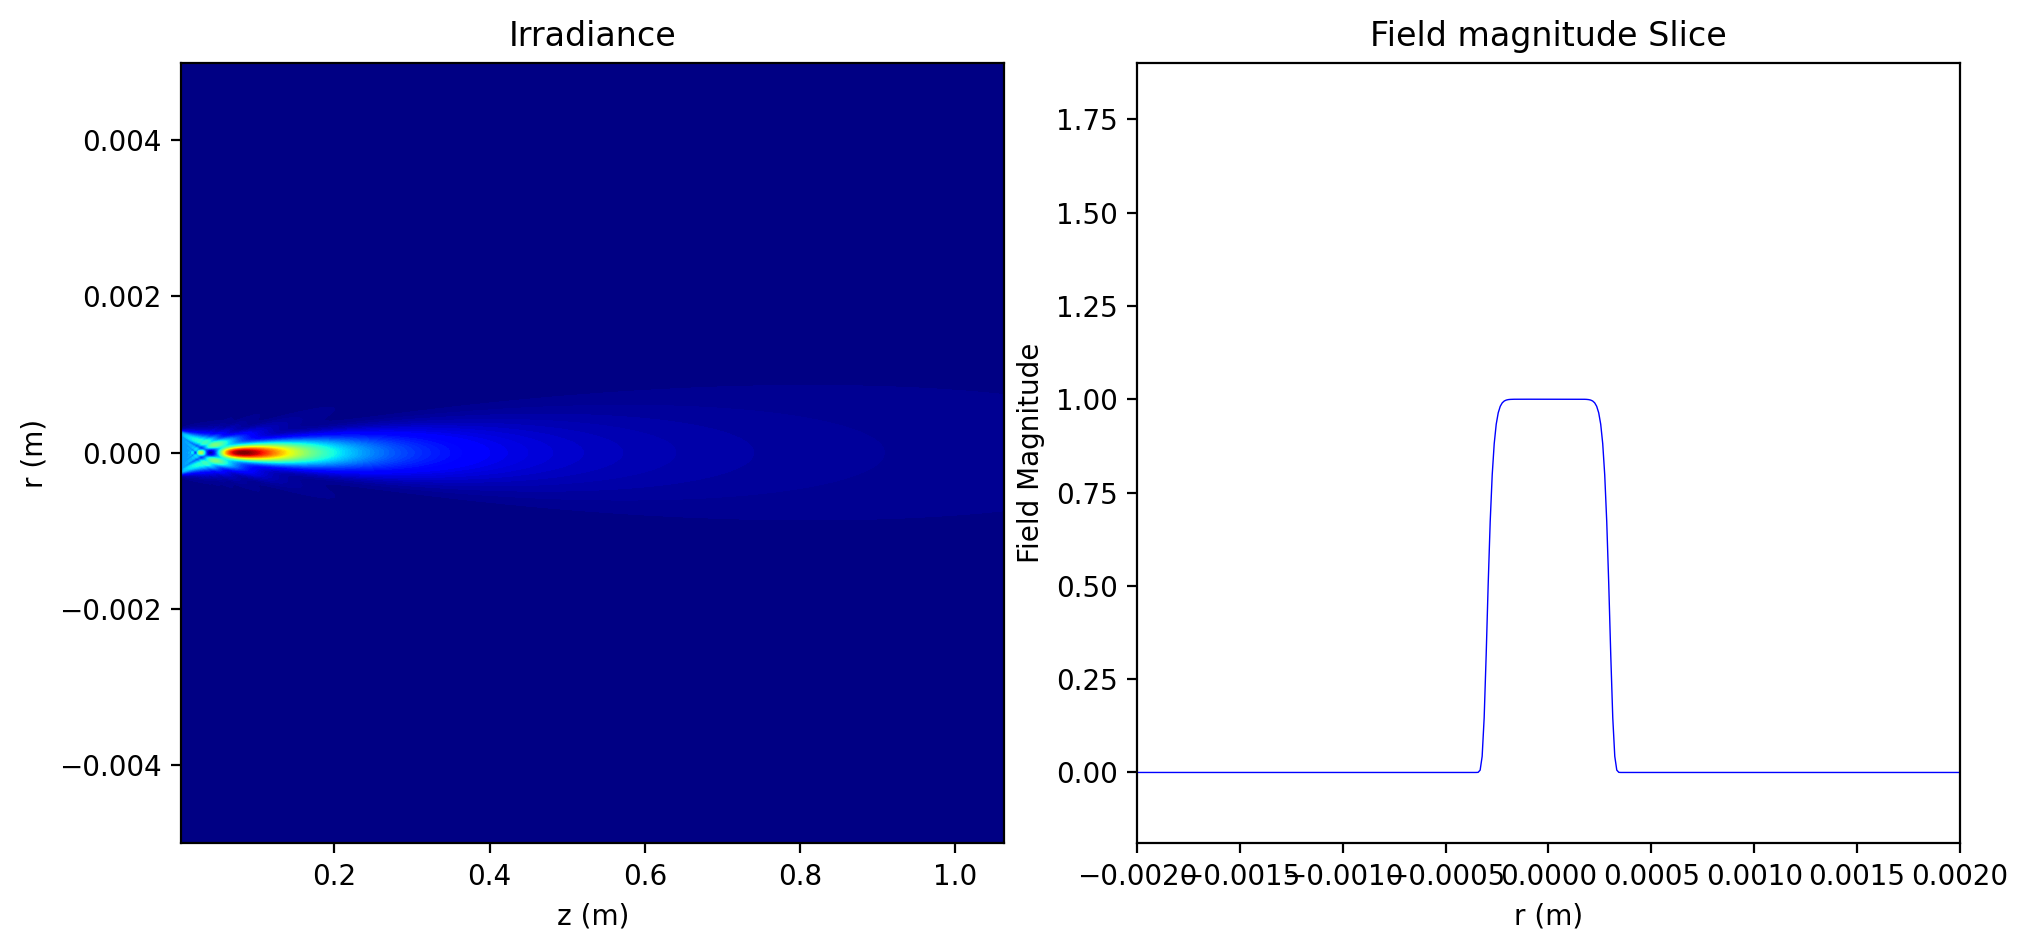

In [9]:
# plot i2_xz slices for different z along the x axis and make a movie for different z
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


### Choose the slice to plot
slice_var = np.abs(u2_xz) # i2_xz or u2_xz
tot_frames = divs_z

# create figure and axes
fig, ax = plt.subplots(1,2, figsize=(10,5))
# set dpi
fig.set_dpi(200)

# setup the plots
ax[0].set_xlabel('z (m)')
ax[0].set_ylabel('r (m)')
ax[0].set_title('Irradiance')
ax[1].set_xlabel('r (m)')
ax[1].set_ylabel('Field Magnitude')
ax[1].set_title('Field magnitude Slice')

# create the objects that change in the animations

# title of the figure
title = fig.suptitle('')
line1, = ax[0].plot([], [], 'r',linewidth=1.5)
line2, = ax[1].plot([], [], 'r--',linewidth=1)

# # plot the static things
ax[0].contourf(z2_mesh, x2_mesh, i2_xz, 100, cmap='jet')




# ax[1].plot(x2, i2_xz[0,:], 'b',lw=0.5)
ax[1].plot(x2, (slice_var[0,:]), 'b',lw=0.5)
# tight layout
fig.tight_layout()

# limit the y in second plot to the max of the irradiance
# ax[1].set_ylim(0, np.max(i2_xz))
ax[1].set_ylim(-0.1*np.max(slice_var), np.max(slice_var))

# zoom into the slice on second plot
ax[1].set_xlim(-0.002, 0.002)

# ## set equal aspect ratio
# ax[0].set_aspect('equal')

# animation function. This is called sequentially
def drawframe(n):
    # update the data

    # select the id with logarithmic spacing which goes from 0 to divs_z-1
    # id = int(np.logspace(0, np.log10(divs_z-1), tot_frames)[n])
    # id = int((n/tot_frames)*3*divs_z/4+divs_z/4)
    id = int((n/tot_frames)*(divs_z-1)+1)
    znow = z2[id]

    # make a vertical line for plot 1
    xline = np.array([znow, znow])
    yline = np.array([x2[0], x2[-1]])
    line1.set_data(xline, yline)

    # # for plot 2 make a slice of the irradiance
    # line2.set_data(x2, i2_xz[id,:])

    # for plot 2 make a slice of the mag of the field
    line2.set_data(x2, (slice_var[id,:]))

    znow = znow*1e3

    # the title with the current z in scientific notation
    title.set_text('z = {:.2e} mm'.format(znow))
    # # print id
    # print(id)

    return (line1,line2)




In [10]:
from matplotlib import animation

save_name = "irradiance_slice_xz_crossField.mp4"


# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=tot_frames, interval=30, blit=True)
from IPython.display import HTML
HTML(anim.to_html5_video())

# save the video
anim.save(save_name, fps=30, extra_args=['-vcodec', 'libx264'])